# Modelo de regresión lineal 1

In [1]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from regressors import stats

# Estilos
sns.set(style='whitegrid')

## Preprocesamiento y entrenamiento
* Sin Country y Year

In [ ]:
# Selección de columnas
df = pd.read_csv('../datos/procesados/procesado_life_expectancy.csv')
df = df.drop(columns=['Country', 'Year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2912 entries, 0 to 2911
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  2912 non-null   float64
 1   Adult Mortality                  2912 non-null   float64
 2   infant deaths                    2912 non-null   int64  
 3   Alcohol                          2912 non-null   float64
 4   percentage expenditure           2912 non-null   float64
 5   Hepatitis B                      2912 non-null   float64
 6   Measles                          2912 non-null   int64  
 7   BMI                              2912 non-null   float64
 8   under-five deaths                2912 non-null   int64  
 9   Polio                            2912 non-null   float64
 10  Total expenditure                2912 non-null   float64
 11  Diphtheria                       2912 non-null   float64
 12  HIV/AIDS            

In [4]:
# se selecciona la variable objetivo y los predictores
X = df.drop(columns=['Life expectancy'])
y = df['Life expectancy']
X_cols = X.columns

# Se instancia el Scaler
scaler = StandardScaler()

# Se dividen los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Se escalan los datos y se convierten en df
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [5]:
# Instanciar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

## Métricas

In [6]:
# R² (Coeficiente de Determinación) Entre cero y uno, por encima de 0.7 puede llegar a ser un buen aceptable
r2 = round(r2_score(y_test, y_pred),3)

# Error Cuadrático Medio - Está en unidades cuadradas de la variable objetivo
mse = round(mean_squared_error(y_test, y_pred),3)

# Raiz del MSE (RMSE) - Está en las mismas unidades de la variable objetivo, entre más bajo mejor
rmse = round((mse ** 0.5), 3)

# Error relativo promedio - Menor al 10% Excelente, entre 11% y 20% Bueno, por encima de 30% necesita ajustes
error_relativo = round((rmse / df['Life expectancy'].mean() *100),3)

# Error absoluto medio (MAE) - Debe ser bajo en relación al rango de la variable objetivo
mae = round(mean_absolute_error(y_pred, y_test), 3)

In [ ]:
# Resumen
stats.summary(modelo, X_test, y_test, X_cols)

Residuals:
     Min      1Q  Median     3Q     Max
-21.6761 -2.7102 -0.0758 3.2233 26.2955


Coefficients:
                                  Estimate  Std. Error   t value   p value
_intercept                       69.406269    0.229204  302.8150  0.000000
Adult Mortality                  -3.783853    0.264410  -14.3106  0.000000
infant deaths                    20.434530    2.039005   10.0218  0.000000
Alcohol                           0.787655    0.280376    2.8093  0.005132
percentage expenditure            1.590386    0.247599    6.4232  0.000000
Hepatitis B                       0.249421    0.288367    0.8649  0.387427
Measles                          -0.552665    0.259000   -2.1338  0.033273
BMI                               0.303726    0.295853    1.0266  0.305031
under-five deaths               -21.196621    2.050678  -10.3364  0.000000
Polio                             0.553938    0.315249    1.7571  0.079419
Total expenditure                -0.032726    0.244788   -0.1337  0.

In [8]:
print('r2:', r2) # Por encima del 75 es un buen modelo, por encima de 85 es un excelente modelo, por encima de 90 es un modelo perfecto
print('mse:', mse) # Evalua el modelo entre 3 y -3
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse} en unidades de la variablre objetivo")
print(f'Error relativo promedio: {error_relativo}')
print(f'MAE: {mae}')

r2: 0.656
mse: 30.627
Raíz del Error Cuadrático Medio (RMSE): 5.534 en unidades de la variablre objetivo
Error relativo promedio: 7.982
MAE: 4.003


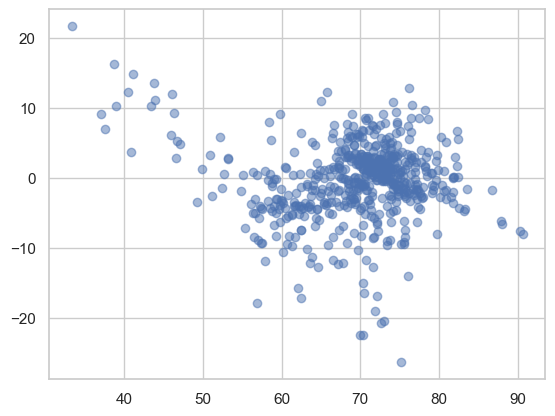

In [9]:
# Gráfico de residuales
residuales = np.subtract(y_test, y_pred.reshape(-1)) # reshape para que quede con las mismas dimensiones
plt.scatter(y_pred, residuales, alpha=0.5)
plt.show()

Revisar las métricas